In [196]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import pandas as pd
import time 
import os
import pathlib
import datetime
import matplotlib.pyplot as plt
from torch import optim
from torch.autograd import Variable 
from pathlib import Path
from random import randint
import torch.nn as nn
import torch.nn.functional as F
from statistics import mode, mean
import matplotlib.pyplot as plt

directory = r'C:\Users\savva\OneDrive\Desktop\npy'
patient_ID = ['2zbyXzYNKPwiPtjaA2L64o.npy','3hY7Mp7u9YPo1xMARSxLhc.npy','4h1dAuzg9rdrhyojwxUS26.npy','BL3rTLVVUbXDyCxtWhSky6.npy']
colums1 = ['time','end time']
colums2 = ['time','end time','Reading 1']
colums3 = ['time','end time','Reading 1','Reading 2']
door_key = 0
switch = 0
pir_key = 0
hidden_size = 2
hidden_size
def Data_Loader(patient):#,trimmed,x,y):
    sensors_lst = []
    column_names = []
    for subdirectory in os.scandir(directory):
        lock = False
        for patients in os.scandir(subdirectory):
            if str(pathlib.Path(patients)).endswith(patient_ID[0]):
                if lock == False:
                    column_names.append(str(os.path.basename(subdirectory)))
                    lock == True                                              
                sensors = np.load(pathlib.Path(patients))
                sensors_lst.append(sensors)
    sensors_pd = pd.DataFrame([sensors_lst],columns=column_names)
    dataframe_lst = []
    df = pd.DataFrame()
    sensor_num = 0
    Sensor_ID = column_names[sensor_num]
    # print(Sensor_ID)
    for i in range(len(sensors_pd[Sensor_ID].loc[0])):
        dataframe_lst.append(sensors_pd[Sensor_ID].loc[0][i])
    if len(sensors_pd[Sensor_ID].loc[0][0]) == 2: 
        df = pd.DataFrame(dataframe_lst,columns = colums1)
        df = df.drop("end time", axis=1)
    elif len(sensors_pd[Sensor_ID].loc[0][0]) == 3:    
        df = pd.DataFrame(dataframe_lst,columns = colums2)
        df = df.drop("end time", axis=1)
    elif len(sensors_pd[Sensor_ID].loc[0][0]) == 4:    
        df = pd.DataFrame(dataframe_lst,columns = colums3)
        df = df.drop("end time", axis=1)
    df['labels'] = 0
    time = df['time']
    anomaly_lst = []
    col_name = df.columns
    col_len = len(df.columns)
    delta_t = []
    for i in range(0,len(df)-1):
        delta = abs(df.iloc[i,0] - df.iloc[i+1,0])
        delta_t.append(delta*100)
        i = i+1
    df['time delta'] = pd.Series(delta_t)
    df.dropna(axis=1,inplace=False)
    return df, Sensor_ID

def activity_pir_anomaly(time,n,id): #spam
    global pir_time
    global pir_key
    global switch
    value = 5.0
    if pir_key == 0.0:
        time_p = time
        return [time_p,id,0,1.0] 
    if pir_key == 1.0:
        time_p = time + 1.0
        return [time_p] + [value] + [0] + [1.0]

def ambient_temp_anomaly(time,n,id): # variance
    global pir_time
    global pir_key
    variancen = randint(0.0,100.0)
    sen_diff = 0.0
    if pir_key == 0:
        pir_time = time     
        pir_key = 1
    if pir_key == 1:
        pir_time = pir_time +1.0
        return [pir_time] + [id]+ [variancen]+ [0] + [1.0]

def appliance_use_anomaly(time,n,id): # spam
    global pir_time
    global pir_key
    intiger = 3.0
    sen_diff = 0.0
    if pir_key == 0:
        pir_time = time     
        pir_key = 1
    if pir_key == 1:
        pir_time = pir_time + 500.0
        return [pir_time]  + [intiger]+ [0] + [500.0]

def blood_pressure_anomaly(time,n,id): # small spike
    global pir_time
    global pir_key
    varianc1 = randint(100.0,300.0)
    varianc2 = randint(80.0,200.0)
    sen_diff = 0.0
    if pir_key == 0:
        pir_time = time     
        pir_key = 1
    if pir_key == 1:
        pir_time = pir_time +20.0
        return [pir_time] + [varianc1]+ [varianc2]+ [0] + [20.0]

def body_mass_index_anomaly(time,n,id): # variance
    global pir_time
    global pir_key
    variancen = randint(0.0,30.0)
    if pir_key == 0:
        pir_time = time     
        pir_key = 1
    if pir_key == 1:
        pir_time = pir_time +20.0
        return [pir_time] + [variancen]+ [0] + [20.0]

def body_temperature_anomaly(time,n,id): # #Variance
    global pir_time
    global pir_key
    variancen = randint(0.0,50.0)
    sen_diff = 0.0
    if pir_key == 0:
        pir_time = time     
        pir_key = 1
    if pir_key == 1:
        pir_time = pir_time + 500.0
        return [pir_time] + [variancen]+ [0] + [500.0]

def body_weight_anomaly(time,n,id): #Spike
    global pir_time
    global pir_key
    spike = randint(500.0,600.0)
    spiketime = randint(8000000,9000000)
    sen_diff = 0.0
    if pir_key == 0:
        pir_time = time     
        pir_key = 1
    if pir_key == 1:
        pir_time = pir_time + spiketime
        return [pir_time] + [spike]+ [0] + [spiketime]

def door_sensor_anomaly(time,n,value):#create
    global pir_time
    global pir_key
    if pir_key == 0.0:
        time_p = time
        return [time_p,id,value,0,10.0] 
    if pir_key == 1.0:
        time_p = time + 10.0
        return [time_p] + [id] + [value] + [0] + [10.0]

def heart_rate_anomaly(time,n,id): #spike
    global pir_time
    global pir_key
    spike = randint(300.0,400.0)
    spiketime = randint(0,10000)
    sen_diff = 0.0
    if pir_key == 0:
        pir_time = time     
        pir_key = 1
    if pir_key == 1:
        pir_time = pir_time + spiketime
        return [pir_time] + [spike]+ [0] + [spiketime]

def light_anomaly(time,n,id): #spike
    global pir_time
    global pir_key
    variancen = randint(0.0,10000.0)
    delta_t = randint(0,100)
    if pir_key == 0:
        pir_time = time     
        pir_key = 1
    if pir_key == 1:
        pir_time = pir_time +20.0
        return [pir_time] + [id]+ [variancen]+ [0] + [delta_t]

def oxygen_saturation_anomaly(time,n,id): # variance
    global pir_time
    global pir_key
    variancen = randint(0.0,200.0)
    sen_diff = 0.0
    if pir_key == 0:
        pir_time = time     
        pir_key = 1
    if pir_key == 1:
        pir_time = pir_time +10.0
        return [pir_time] + [variancen] + [0] + [10.0]

def skin_temperature_anomaly(time,n,id): #spike
    global pir_time
    global pir_key
    variancen = randint(0.0,1000.0)
    delta_t = randint(0,100)
    if pir_key == 0:
        pir_time = time     
        pir_key = 1
    if pir_key == 1:
        pir_time = pir_time +20.0
        return [pir_time] + [variancen]+ [0] + [delta_t]

def sleep_event_anomaly(time,n,value):#create
    global pir_time
    global pir_key
    if pir_key == 0.0:
        time_p = time
        return [time_p,value,0,10.0] 
    if pir_key == 1.0:
        time_p = time + 10.0
        return [time_p] + [value] + [0] + [10.0]

def sleep_mat_heart_rate_anomaly(time,n,id): #spike
    global pir_time
    global pir_key
    variancen = randint(100.0,1000.0)
    delta_t = randint(0,10000)
    if pir_key == 0:
        pir_time = time     
        pir_key = 1
    if pir_key == 1:
        pir_time = pir_time + delta_t 
        return [pir_time] + [variancen]+ [0] + [delta_t]

def sleep_mat_respiratory_rate_anomaly(time,n,id): #spike
    global pir_time
    global pir_key
    variancen = randint(25.0,100.0)
    delta_t = randint(0,10000)
    if pir_key == 0:
        pir_time = time     
        pir_key = 1
    if pir_key == 1:
        pir_time = pir_time + delta_t 
        return [pir_time] + [variancen]+ [0] + [delta_t]

def sleep_mat_snoring_rate_anomaly(time,n,value):#create
    global pir_time
    global pir_key
    if pir_key == 0.0:
        time_p = time
        return [time_p,value,0,10.0] 
    if pir_key == 1.0:
        time_p = time + 10.0
        return [time_p] + [value] + [0] + [10.0]

def sleep_mat_state_anomaly(time,n,value):#create
    global pir_time
    global pir_key
    if pir_key == 0.0:
        time_p = time
        return [time_p,value,0,10.0] 
    if pir_key == 1.0:
        time_p = time + 10.0
        return [time_p] + [value] + [0] + [10.0]

def anomaly_insertion(n,type,dataframe,id):
    df = dataframe
    anomaly_lst = []
    col_name = df.columns
    col_len = len(df.columns)
    start_t = min(dataframe['time'])
    end_t = max(dataframe['time'])
    value = 0
    for i in range(n):
        random_timestamp = random.randint(start_t,end_t)
        value = i%2 #for the create

        if type == 'activity_pir':
            zp_anomaly_lst= activity_pir_anomaly(random_timestamp,col_len,id)   
        if type == 'ambient_temperature':
            zp_anomaly_lst= ambient_temp_anomaly(random_timestamp,col_len,id)  
        if type == 'appliance_use':
            zp_anomaly_lst= appliance_use_anomaly(random_timestamp,col_len,id)   
        if type == 'blood_pressure':
            zp_anomaly_lst= blood_pressure_anomaly(random_timestamp,col_len,id) 
        if type == 'body_mass_index':
            zp_anomaly_lst= body_mass_index_anomaly(random_timestamp,col_len,id) 
        if type == 'body_temperature':
            zp_anomaly_lst= body_temperature_anomaly(random_timestamp,col_len,id)      
        if type == 'body_weight':
            zp_anomaly_lst= body_weight_anomaly(random_timestamp,col_len,id) 
        if type == 'door_sensor':
            zp_anomaly_lst= door_sensor_anomaly(random_timestamp,col_len,id) 
        if type == 'heart_rate':
            zp_anomaly_lst= heart_rate_anomaly(random_timestamp,col_len,id) 
        if type == 'light':
            zp_anomaly_lst= light_anomaly(random_timestamp,col_len,id)          
        if type == 'oxygen_saturation':
            zp_anomaly_lst= oxygen_saturation_anomaly(random_timestamp,col_len,id)          
        if type == 'skin_temperature':
            zp_anomaly_lst= skin_temperature_anomaly(random_timestamp,col_len,id) 
        if type == 'sleep_event':
            zp_anomaly_lst= sleep_event_anomaly(random_timestamp,col_len,value) 
        if type == 'sleep_mat_heart_rate':
            zp_anomaly_lst= sleep_mat_heart_rate_anomaly(random_timestamp,col_len,id)    
        if type == 'sleep_mat_respiratory_rate':
            zp_anomaly_lst= sleep_mat_respiratory_rate_anomaly(random_timestamp,col_len,id)  
        if type == 'sleep_mat_snoring':
            zp_anomaly_lst= sleep_mat_snoring_rate_anomaly(random_timestamp,col_len,value) 
        if type == 'sleep_mat_state':
            zp_anomaly_lst= sleep_mat_state_anomaly(random_timestamp,col_len,value) 
                      
        anomaly_lst.append(zp_anomaly_lst)
    anomaly_df = pd.DataFrame(anomaly_lst,columns=col_name)
    concat_df = pd.concat([dataframe,anomaly_df],ignore_index=True)
    concat_df = concat_df.reset_index(drop=True)
    return  concat_df,anomaly_lst

def Time_Selection(dataframe,period):
    morning1 = datetime.datetime(2000, 1, 1, 6, 0)
    morning2 = datetime.datetime(2000, 1, 1, 12, 0)
    afternoon1 = datetime.datetime(2000, 1, 1, 12, 0)
    afternoon2 = datetime.datetime(2000, 1, 1, 18, 0)
    night1 = datetime.datetime(2000, 1, 1, 18, 0)
    night2 = datetime.datetime(2000, 1, 1, 23, 59)
    lst = []
    time_lst = []
    if period == 'morning':
        for i in range(len(dataframe)):        
            curr_time = dataframe['time'].loc[i]
            curr_time = pd.to_datetime(curr_time,utc = True,unit = 's')       
            if morning1.time() < curr_time.time() < morning2.time():
                lst.append(i)
                time_lst.append(curr_time.time())
                if len(lst) > 10:
                    break
                else: pass
            else: pass

    if period == 'afternoon':
        for i in range(len(dataframe)):        
            curr_time = dataframe['time'].loc[i]
            curr_time = pd.to_datetime(curr_time,utc = True,unit = 's')       
            if afternoon1.time() < curr_time.time() < afternoon2.time():
                lst.append(i)
                time_lst.append(curr_time.time())
                if len(lst) > 10:
                    break
                else: pass
            else: pass

    if period == 'night':
        for i in range(len(dataframe)):        
            curr_time = dataframe['time'].loc[i]
            curr_time = pd.to_datetime(curr_time,utc = True,unit = 's')       
            if night1.time() < curr_time.time() < night2.time():
                lst.append(i)
                time_lst.append(curr_time.time())
                if len(lst) > 10:
                    break
                else: pass
            else: pass
            
    return lst,time_lst

def Data_Preprocessing(time):

    df,Sensor_ID = Data_Loader(patient_ID[3])
    buss,time_lst = Time_Selection(df,time)
    low_t = min(buss)
    max_t = max(buss)
    df[low_t:max_t]

    dataT = df[low_t:max_t]
    dataV = df[low_t:max_t]
    dataV = dataV[0:5]
    # print(Sensor_ID)
    dataV,anom_lst = anomaly_insertion(10,Sensor_ID,dataV,5.0)
    dataT = dataT.astype('float32')
    dataV = dataV.astype('float32')
    timeT = dataT['time']
    timeV = dataV['time']
    dataV.sort_values('time')
    initial_time = dataV['time'].loc[0]
    size = len(dataV)
    end_time = dataV['time'].loc[size-1]
    dataT.drop('time', axis = 1, inplace = True)
    dataV.drop('time', axis = 1, inplace = True)
    train_data = dataT
    valid_data = dataV

    X_trainD = train_data.loc[:, train_data.columns != 'labels']
    X_valD = valid_data.loc[:, valid_data.columns != 'labels']
    Y_trainD = train_data.loc[:,'labels']
    Y_valD = valid_data.loc[:,'labels']

    X_train = torch.tensor(X_trainD.values).float()
    X_val =torch.tensor(X_valD.values).float()
    Y_train = torch.tensor(Y_trainD.values).float()
    Y_val = torch.tensor(Y_valD.values).float()

    Y_tensor = Y_train.clone().detach()
    new_shape = (len(Y_tensor), 1)
    Y_train = Y_tensor.view(new_shape)

    Y_tensor = Y_val.clone().detach()
    new_shape = (len(Y_tensor), 1)
    Y_val = Y_tensor.view(new_shape)

    torch.flatten(X_train)
    torch.flatten(Y_train)
    torch.flatten(X_val)
    torch.flatten(Y_val)

    return X_train,Y_train,X_val,Y_val,train_data,valid_data,time_lst,anom_lst

global size_mat
size_mat = len(X_train[0]-2)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(size_mat, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 512)        
        self.fc4 = nn.Linear(512, 2)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

def Train_AD(time):
    X_train,Y_train,X_val,Y_val,train_data,valid_data,time_lst,anom_insertion_lst = Data_Preprocessing(time)
    model = Net()
    optimizer = torch.optim.SGD(model.parameters(), lr = 3e-5)
    criterion = nn.L1Loss()
    batch_size = 1
    n_epochs = 10
    permutation_train = torch.randperm(X_train.size()[0])
    permutation_val = torch.randperm(X_val.size()[0])
    for epoch in range(n_epochs):
        anomalies = []
        train_loss = []
        valid_loss = []
        accuracy = 0
        accuracy_history = []
        timer_plot = []
        for i in range(0,len(train_data), batch_size):
            optimizer.zero_grad()
            indices = permutation_train[i:i+batch_size]
            batch_x, batch_y = X_train[indices], Y_train[indices]
            outputs = model.forward(batch_x)
            loss = criterion(outputs,batch_y)
            train_loss.append(loss.item())
            loss.backward()
            optimizer.step()
           # print(f"Training) # :   "+str(i)+"/"+str(X_train.size()[0]), end = "\r")  
        threshold = mean(train_loss)*1.5
        for a in range(0,X_val.size()[0], batch_size):
   #         start_time = time.time() 
            indicesV = permutation_val[a:a+batch_size]
            batch_x_val, batch_y_val = X_val[indicesV], Y_val[indicesV]
            output = model.forward(batch_x_val)
            pred = torch.max(output,1)[1]
            loss = criterion(output,batch_y_val)
            valid_loss.append(loss.item())
            if loss.item() >= threshold:
                anomalies.append(batch_x_val)
    #        time_elapsed = time.time() - start_time
     #       timer_plot.append(1000*time_elapsed/len(X_val))
            # print(f"-> Testing :     "+str(a)+"/"+str(X_val.size()[0]), end = "\r")
    return anomalies,train_loss,valid_loss,time_lst,anom_insertion_lst




anomalies,tL,vL,times,anom_insertion_lst = Train_AD('night')
size1 = len(anomalies)
s = anom_insertion_lst
is_there = [x for x in anomalies if x not in s]
size2 = len(is_there)
fake_positive = size1 - size2
print('')
print('Correctly Identified Anomalies: ' + str(size2))
print('Fake Positives: '+ str(fake_positive))







Correctly Identified Anomalies: 10
Fake Positives: 0


In [184]:
print(anomalies)

[tensor([[5., 1.]]), tensor([[  11., 2100.]]), tensor([[5., 1.]]), tensor([[5., 1.]]), tensor([[  14., 2300.]]), tensor([[5., 1.]]), tensor([[5., 1.]]), tensor([[5., 1.]]), tensor([[  12., 2800.]]), tensor([[5., 1.]]), tensor([[  11., 1100.]]), tensor([[5., 1.]]), tensor([[5., 1.]]), tensor([[5., 1.]])]


In [516]:



list1 = [patient1_activitypir,patient1_bloodpressure,patient1_bodymassindex,patient1_bodytemperature,patient1_bodyweight,patient1_doorsensor,patient1_heartrate,patient1_light]
df = pd.DataFrame(columns=['Label','Time Window','Correct Identification','False Positives'])
label_list = []
for i in range(len(list1)):
    label_list.append(list1[i][0][0])

for i in range(3):
    df.loc[i]  = list1[0][i]
    df.loc[i+3]= list1[1][i]
    df.loc[i+6]= list1[2][i]
    df.loc[i+9]= list1[3][i]
    df.loc[i+12]= list1[4][i]
    df.loc[i+15]= list1[5][i]
    df.loc[i+18]= list1[6][i]
    df.loc[i+21]= list1[7][i]
for i in range(len(df)):
    df['Time Window'].loc[i] = datetime.strptime(df['Time Window'].loc[i] ,'%H:%M:%S').strftime('%H:%M')


df = df.sort_values('Time Window')
df = df.reset_index(drop=None)
df.drop('index', axis=1, inplace=True) 
display(df)

,Label,Time Window,Correct Identification,False Positives
0,Heart Rate,00:49,8,1
1,Activity PIR,00:51,10,0
2,Light,05:13,2,0
3,Heart Rate,07:00,8,2
4,Body Weight,07:25,5,0
5,Blood Pressure,07:25,10,0
6,Door Sensor,07:32,1,0
7,Body Temperature,07:53,3,0
8,Body Mass Index,07:57,10,0
9,Body Mass Index,08:29,8,2


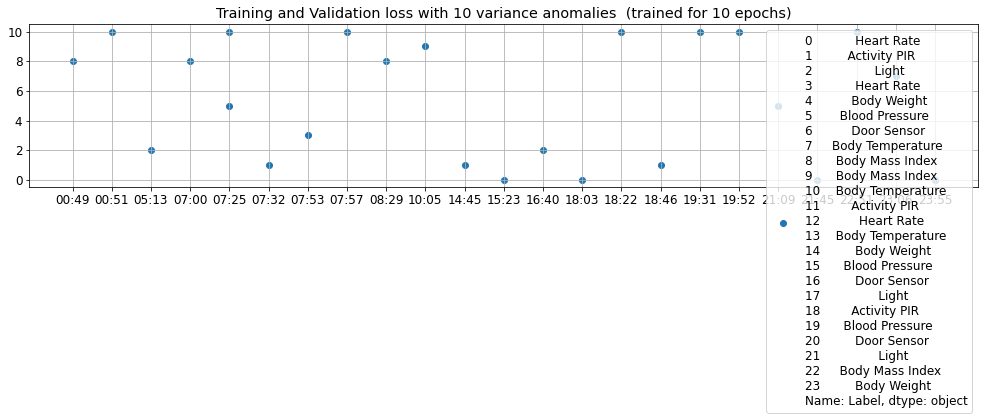

In [559]:

plt.figure(figsize=(17, 3))
plt.rcParams.update({'font.size': 12})
plt.title('Training and Validation loss with 10 variance anomalies  (trained for 10 epochs)')
plt.scatter(df['Time Window'],df['Correct Identification'],label = df['Label'])
plt.grid()
plt.legend()